# Multiclass classifier

Classify articles from a Reuters dataset having 46 different categories

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

### Get datasets

In [2]:
LIMIT_WORD = 10000

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=LIMIT_WORD)

### Data exploring (convert sequences to original review)

In [3]:
def convert_to_english(sequence):
    word_index = reuters.get_word_index()
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, '?') for i in sequence]
    )
    
    return decoded_review

In [4]:
print(convert_to_english(train_data[0]))

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### Pre-process the data (convert sequences into tensors)

In [5]:
def vectorize_sequences(sequences, dimension=LIMIT_WORD):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

#### Vectorize examples

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#### One-hot encoding of labels (categorical encoding)

In [8]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building the network

#### Architecture

- 2 intermediate Dense layers with 16 hidden unites per each (relu actovation function)
- 1 output layer (with sigmoid activation function)

In [10]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### Compile

**Loss function:** _binary crossentropy_
**Optimizer:** _rmsprop_

In [11]:
model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

#### Training
- Define validation data
- Define epochs and batch size
- Fit the model

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 116us/sample - loss: 2.5877 - categorical_accuracy: 0.4866 - val_loss: 1.7296 - val_categorical_accuracy: 0.6190
Epoch 2/20
7982/7982 [==============================] - 1s 67us/sample - loss: 1.3991 - categorical_accuracy: 0.7038 - val_loss: 1.3148 - val_categorical_accuracy: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 65us/sample - loss: 1.0326 - categorical_accuracy: 0.7841 - val_loss: 1.1677 - val_categorical_accuracy: 0.7300
Epoch 4/20
7982/7982 [==============================] - 0s 61us/sample - loss: 0.8048 - categorical_accuracy: 0.8334 - val_loss: 1.0171 - val_categorical_accuracy: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 65us/sample - loss: 0.6392 - categorical_accuracy: 0.8678 - val_loss: 0.9491 - val_categorical_accuracy: 0.8020
Epoch 6/20
7982/7982 [==============================] - 0s 61us/sample - loss: 0.5050 - categori

### Plot results

#### Training and validation loss

<function matplotlib.pyplot.show(*args, **kw)>

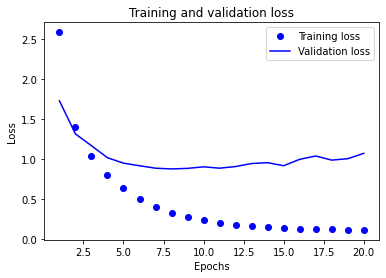

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['categorical_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [15]:
history_dict.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

#### Training and validation accuracy

<function matplotlib.pyplot.show(*args, **kw)>

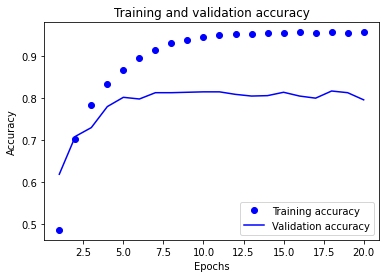

In [16]:
plt.clf()

acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

The graphs show that the model starts overfitting after ~10 epochs. Let's train it again with better hyperparameters

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 110us/sample - loss: 2.5890 - categorical_accuracy: 0.5153 - val_loss: 1.6957 - val_categorical_accuracy: 0.6260
Epoch 2/10
7982/7982 [==============================] - 1s 70us/sample - loss: 1.4276 - categorical_accuracy: 0.7008 - val_loss: 1.3144 - val_categorical_accuracy: 0.6970
Epoch 3/10
7982/7982 [==============================] - 1s 65us/sample - loss: 1.0681 - categorical_accuracy: 0.7681 - val_loss: 1.1524 - val_categorical_accuracy: 0.7470
Epoch 4/10
7982/7982 [==============================] - 1s 67us/sample - loss: 0.8389 - categorical_accuracy: 0.8191 - val_loss: 1.0426 - val_categorical_accuracy: 0.7780
Epoch 5/10
7982/7982 [==============================] - 1s 69us/sample - loss: 0.6735 - categorical_accuracy: 0.8577 - val_loss: 0.9675 - val_categorical_accuracy: 0.8000
Epoch 6/10
7982/7982 [==============================] - 1s 67us/sample - loss: 0.5400 - categori

In [33]:
print(results)

[1.009892533957056, 0.7902939]


In [34]:
model.predict(x_test)

array([[9.5555675e-05, 4.1223677e-05, 5.9732270e-06, ..., 8.4474605e-06,
        2.8842246e-06, 3.9834860e-05],
       [5.2923879e-05, 4.8729219e-03, 3.6130776e-04, ..., 2.7193574e-03,
        7.5042913e-06, 1.2056468e-06],
       [1.4567733e-04, 8.8359046e-01, 4.8508430e-03, ..., 3.2348607e-03,
        7.0754027e-06, 3.8999908e-05],
       ...,
       [6.5655986e-05, 1.3337305e-04, 2.7083925e-05, ..., 3.2714066e-05,
        8.6744922e-06, 6.2861247e-05],
       [1.5852891e-03, 9.2632450e-02, 2.5552192e-03, ..., 6.8909382e-03,
        6.1394251e-04, 9.0326834e-04],
       [1.1718799e-04, 7.2575665e-01, 1.6222894e-02, ..., 1.9016492e-03,
        7.5688044e-06, 3.5573521e-05]], dtype=float32)

With this approach we obtained an accuracy of ~80%.